[130.64189796 135.98173469 132.47391837 130.05569388 135.34804082
 131.75402041 130.96055102 136.14328571 132.47636735 131.48467347]


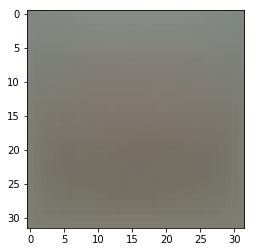

(49000, 3073) (1000, 3073) (1000, 3073) (500, 3073)
loss: 8.843106
8.843106s taken for generating svm loss: 6.194806e-02
8.843106s to generate vctrizd Loss 1.526284e-02
difference: 0.000000
0.062016s time for svm loss and grdnt
0.015369s to generate vctrizd and svm diff
difference of naive and vectorized gradient: 0.000000
iteration_no 0 / 1500: loss 786.897623
iteration_no 100 / 1500: loss 285.778155
iteration_no 200 / 1500: loss 107.266525
iteration_no 300 / 1500: loss 42.077517
iteration_no 400 / 1500: loss 18.645578
iteration_no 500 / 1500: loss 9.823494
iteration_no 600 / 1500: loss 6.520854
iteration_no 700 / 1500: loss 6.541640
iteration_no 800 / 1500: loss 5.941155
iteration_no 900 / 1500: loss 5.080007
iteration_no 1000 / 1500: loss 6.062489
iteration_no 1100 / 1500: loss 5.821566
iteration_no 1200 / 1500: loss 5.601836
iteration_no 1300 / 1500: loss 5.574787
iteration_no 1400 / 1500: loss 5.067507
Time taken :7.710766s


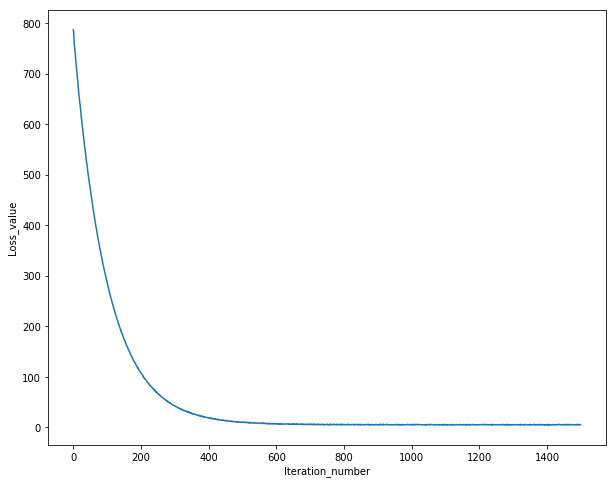

training accuracy: 0.370531
accuracy of validation: 0.380000
lrn_rte 1.000000e-07 rgulrxe 2.000000e+04 trn_accrcy: 0.382143 valaccrcy: 0.384000
lrn_rte 1.000000e-07 rgulrxe 4.000000e+04 trn_accrcy: 0.366980 valaccrcy: 0.375000
lrn_rte 1.000000e-07 rgulrxe 6.000000e+04 trn_accrcy: 0.365224 valaccrcy: 0.363000
lrn_rte 1.000000e-07 rgulrxe 8.000000e+04 trn_accrcy: 0.368490 valaccrcy: 0.366000
lrn_rte 1.000000e-07 rgulrxe 3.000000e+05 trn_accrcy: 0.337082 valaccrcy: 0.352000
lrn_rte 1.000000e-07 rgulrxe 5.000000e+05 trn_accrcy: 0.308490 valaccrcy: 0.314000
lrn_rte 2.000000e-07 rgulrxe 2.000000e+04 trn_accrcy: 0.376163 valaccrcy: 0.380000
lrn_rte 2.000000e-07 rgulrxe 4.000000e+04 trn_accrcy: 0.368061 valaccrcy: 0.377000
lrn_rte 2.000000e-07 rgulrxe 6.000000e+04 trn_accrcy: 0.350531 valaccrcy: 0.349000
lrn_rte 2.000000e-07 rgulrxe 8.000000e+04 trn_accrcy: 0.365286 valaccrcy: 0.360000
lrn_rte 2.000000e-07 rgulrxe 3.000000e+05 trn_accrcy: 0.312592 valaccrcy: 0.317000
lrn_rte 2.000000e-07 rgulr

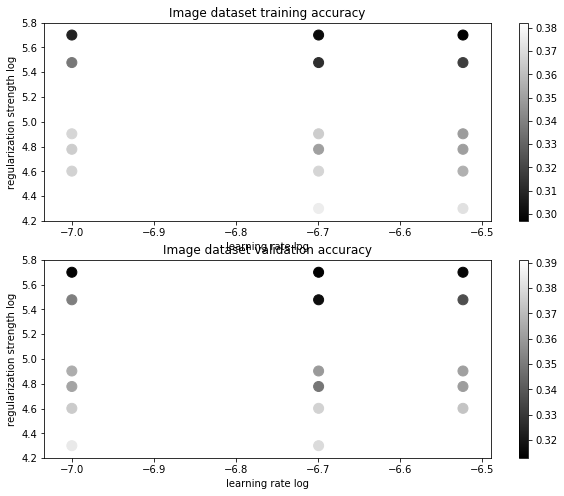

linear SVM test dataset accuracy: 0.360000


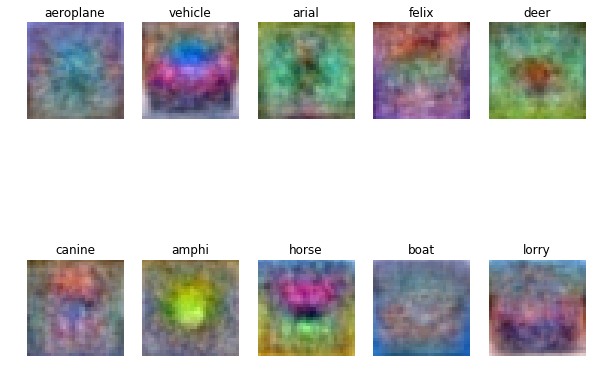

In [4]:
import random as random
import os as os
import matplotlib.pyplot as matplt
import cPickle as cpk
import numpy as npy

#matplotlib graphs
get_ipython().run_line_magic('matplotlib', 'inline')
matplt.rcParams['figure.figsize'] = (10.0, 8.0) #fix sized plots
matplt.rcParams['image.interpolation'] = 'nearest'
matplt.rcParams['image.cmap'] = 'gray'

def training_dataset():
    data_s = []
    label_s = []
    for file_batch in range(1,6):
        data_file = os.path.join('cifar-10-batches-py', 'data_batch_%d' % (file_batch, ))
        with open(data_file, 'rb') as filename:
            temp_images = cpk.load(filename)
            X = temp_images['data'].reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
            Y = npy.array(temp_images['labels'])
        data_s.append(X)
        label_s.append(Y)
    train_data = npy.concatenate(data_s)
    train_label = npy.concatenate(label_s)
    del X, Y
    return train_data, train_label

def test_dataset():
    with open(os.path.join('cifar-10-batches-py', 'test_batch'), 'rb') as filename:
        temp_images = cpk.load(filename)
        test_data = temp_images['data'].reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        test_label = npy.array(temp_images['labels'])
    return test_data, test_label

XTrain, yTrain = training_dataset()
XTest, yTest = test_dataset()

#Data splitting
train_num = 49000
validation_n = 1000
testNum = 1000
developmentNum = 500

#masking of few training images
mask_img = range(train_num, train_num + validation_n)
ValX = XTrain[mask_img]
y_val = yTrain[mask_img]

mask_img = range(train_num)
XTrain = XTrain[mask_img]
yTrain = yTrain[mask_img]

#development set within training set
mask_img = npy.random.choice(train_num, developmentNum, replace=False)
developmentX = XTrain[mask_img]
developmenty = yTrain[mask_img]

# masking of test data
mask_img = range(testNum)
XTest = XTest[mask_img]
yTest = yTest[mask_img]

#re training data into rows
XTrain = npy.reshape(XTrain, (XTrain.shape[0], -1))
ValX = npy.reshape(ValX, (ValX.shape[0], -1))
XTest = npy.reshape(XTest, (XTest.shape[0], -1))
developmentX = npy.reshape(developmentX, (developmentX.shape[0], -1))

#calc mean of all the images
img_mean = npy.mean(XTrain, axis=0)
#print imgs
print img_mean[:10] 
matplt.figure(figsize=(4,4))
matplt.imshow(img_mean.reshape((32, 32, 3)).astype('uint8')) 
# visualization
matplt.show()
#substract image and mean 
XTrain -= img_mean
ValX -= img_mean
XTest -= img_mean
developmentX -= img_mean

#dimension adding
XTrain = npy.hstack([XTrain, npy.ones((XTrain.shape[0], 1))])
ValX = npy.hstack([ValX, npy.ones((ValX.shape[0], 1))])
XTest = npy.hstack([XTest, npy.ones((XTest.shape[0], 1))])
developmentX = npy.hstack([developmentX, npy.ones((developmentX.shape[0], 1))])

print XTrain.shape, ValX.shape, XTest.shape, developmentX.shape

#svm

def SVMnaiveLoss(W1, X1, y1, regularize):

  dW = npy.zeros(W1.shape)
  numClasses = W1.shape[1]
  numTrain = X1.shape[0]
  loss = 0.0
  for i in xrange(numTrain):
    scores = X1[i].dot(W1)
    correctScore = scores[y1[i]]
    differenceCount = 0
    for j in xrange(numClasses):
      if j == y1[i]:
        continue
      m = scores[j] - correctScore + 1 
      if m > 0:
        differenceCount += 1
        dW[:, j] += X1[i] 
        loss += m
    dW[:, y1[i]] += -differenceCount * X1[i]

  #Averaging the loss values
  loss /= numTrain
  dW /= numTrain
  dW += regularize*W1 
  loss += 0.5 * regularize * npy.sum(W1 * W1)
  return loss, dW

#Vectorizeed SVM
def vectorizedSVMLoss(W, X, y, regularize):
  
  loss = 0.0
  dW = npy.zeros(W.shape) 

  numTrain = X.shape[0]
  scores = X.dot(W)
  correctScore = scores[npy.arange(numTrain), y]
  margins = npy.maximum(0, scores - correctScore[:, npy.newaxis] + 1.0)
  margins[npy.arange(numTrain), y] = 0
  loss = npy.sum(margins)

  loss /= numTrain 
  loss += 0.5 * regularize * npy.sum(W * W) 
  maskingX = npy.zeros(margins.shape)
  maskingX[margins > 0] = 1
  incorrect_counts = npy.sum(maskingX, axis=1)
  maskingX[npy.arange(numTrain), y] = -incorrect_counts
  dW = X.T.dot(maskingX)

  dW /= numTrain 
  dW += regularize*W 

  return loss, dW
import time

# generate random weights
W = npy.random.randn(3073,10)*.0001

loss, gradient = SVMnaiveLoss(W, developmentX, developmenty, 0.00001)
print 'loss: %f' % (loss, )

loss, gradient = SVMnaiveLoss(W, developmentX, developmenty, 0.0)

from random import randrange
def sparseGradientCheck(f, x, gradient_analysis, checkn=10, h=1e-5):

  for i in xrange(checkn):
    ix = tuple([randrange(n) for n in x.shape])

    oldval = x[ix]
    x[ix] = oldval + h 
    fxph = f(x) 
    x[ix] = oldval - h 
    fxmh = f(x) 
    x[ix] = oldval 

    numericalGradient = (fxph - fxmh) / (2 * h)
    gradientAnalysis = gradient_analysis[ix]
    relativeError = abs(numericalGradient - gradientAnalysis) / (abs(numericalGradient) + abs(gradientAnalysis))
    
f = lambda w: SVMnaiveLoss(w, developmentX, developmenty, 0.0)[0]
numericalGradient = sparseGradientCheck(f, W, gradient)

loss, gradient = SVMnaiveLoss(W, developmentX, developmenty, 1e2)
f = lambda w: SVMnaiveLoss(w, developmentX, developmenty, 1e2)[0]
numericalGradient = sparseGradientCheck(f, W, gradient)

t1 = time.time()
naiveLoss, naiveGradient = SVMnaiveLoss(W, developmentX, developmenty, 0.00001)
t2 = time.time()
print '%fs taken for generating svm loss: %e' % (naiveLoss, t2 - t1)


t1 = time.time()
vectorizationLoss, _ = vectorizedSVMLoss(W, developmentX, developmenty, 0.00001)
t2 = time.time()
print '%fs to generate vctrizd Loss %e' % (vectorizationLoss, t2 - t1)
print 'difference: %f' % (naiveLoss - vectorizationLoss)

t1 = time.time()
_, naiveGradient = SVMnaiveLoss(W, developmentX, developmenty, 0.00001)
t2 = time.time()
print '%fs time for svm loss and grdnt' % (t2 - t1)

t1 = time.time()
_, vectorizedGradient = vectorizedSVMLoss(W, developmentX, developmenty, 0.00001)
t2 = time.time()
print '%fs to generate vctrizd and svm diff' % (t2 - t1)

diff = npy.linalg.norm(naiveGradient - vectorizedGradient, ord='fro')
print 'difference of naive and vectorized gradient: %f' % diff

class LinrClsfir(object):

  def __init__(self):
    self.W = None

  def trainingDataset(self, X, yh, learningRate=1e-3, regularize=1e-5, iterationNum=100,
            btchSze=200, verbose=False):
    numTrain, dim = X.shape
    numClasses = npy.max(yh) + 1 
    if self.W is None:
      self.W = 0.001 * npy.random.randn(dim, numClasses)

    loss_history = []
    for iterations in xrange(iterationNum):
      Xbtch = None
      ybtch = None
      sample_indices = npy.random.choice(npy.arange(numTrain), btchSze)
      Xbtch = X[sample_indices]
      ybtch = yh[sample_indices]

      #Calc the values of loss and the gradient
      loss, gradient = self.lossFn(Xbtch, ybtch, regularize)
      loss_history.append(loss)

      self.W += -learningRate * gradient
      if verbose and iterations % 100 == 0:
        print 'iteration_no %d / %d: loss %f' % (iterations, iterationNum, loss)

    return loss_history

  def prediction(self, X):
    
    yPredicted = npy.zeros(X.shape[1])
    yPredicted = npy.argmax(X.dot(self.W), axis = 1)
    return yPredicted
  
  def lossFn(self, xBtch, yBtch, regularize):
    pass

class Svm_linr(LinrClsfir):
  def lossFn(self, X_batch, y_batch, regularize):
    return vectorizedSVMLoss(self.W, X_batch, y_batch, regularize)

svm = Svm_linr()
t1 = time.time()
historyLoss = svm.trainingDataset(XTrain, yTrain, learningRate=1e-7, regularize=5e4, iterationNum=1500, verbose=True)
t2 = time.time()
print 'Time taken :%fs' % (t2 - t1)

matplt.plot(historyLoss)
matplt.xlabel('Iteration_number')
matplt.ylabel('Loss_value')
matplt.show()


trainingPrediction_y = svm.prediction(XTrain)
print 'training accuracy: %f' % (npy.mean(yTrain == trainingPrediction_y), )
valuePrediction_y = svm.prediction(ValX)
print 'accuracy of validation: %f' % (npy.mean(y_val == valuePrediction_y), )

learningRates = [1e-7, 2e-7, 3e-7]
regularization_strengths = [2e4, 4e4, 6e4, 8e4, 3e5, 5e5]
resultValue = {}
best_validation = -1   
bestSVM = None 

for l in learningRates:
    for r in regularization_strengths:
        svm = Svm_linr()
        svm.trainingDataset(XTrain, yTrain, learningRate=l, regularize=r, iterationNum=1500, btchSze=200)
        trainingPrediction_y = svm.prediction(XTrain)
        valuePrediction_y = svm.prediction(ValX)
        trainingAccuracy = npy.mean(yTrain == trainingPrediction_y)
        validationAccuracy = npy.mean(y_val == valuePrediction_y)
        resultValue[(l, r)] = (trainingAccuracy, validationAccuracy)
        if validationAccuracy > best_validation:
            best_validation = validationAccuracy
            bestSVM = svm

for lr, regularize in sorted(resultValue):
    trainingAccuracy, validationAccuracy = resultValue[(lr, regularize)]
    print 'lrn_rte %e rgulrxe %e trn_accrcy: %f valaccrcy: %f' % (
                lr, regularize, trainingAccuracy, validationAccuracy)
    
print 'cross validation best accuracy %f' % best_validation



import math
scatterX = [math.log10(x[0]) for x in resultValue]
scatterY = [math.log10(x[1]) for x in resultValue]

# plot accuracy in the train result
mrkrSze = 100
colrs = [resultValue[x][0] for x in resultValue]
matplt.subplot(2,1,1)
matplt.scatter(scatterX, scatterY, mrkrSze, c=colrs)
matplt.colorbar()
matplt.xlabel('learning rate log')
matplt.ylabel('regularization strength log')
matplt.title('Image dataset training accuracy')

# accuracy for validation results plotting
colrs = [resultValue[x][1] for x in resultValue] 
matplt.subplot(2,1,2)
matplt.scatter(scatterX, scatterY, mrkrSze, c=colrs)
matplt.colorbar()
matplt.xlabel('learning rate log')
matplt.ylabel('regularization strength log')
matplt.title('Image dataset validation accuracy')
matplt.show()

# calculating accuracy of test dataset
testPrediction_y = bestSVM.prediction(XTest)
testAccuracy = npy.mean(yTest == testPrediction_y)
print 'linear SVM test dataset accuracy: %f' % testAccuracy

#visualize the weight filters
w = bestSVM.W[:-1,:] 
w = w.reshape(32, 32, 3, 10)
wMin, wMax = npy.min(w), npy.max(w)
classes = ['aeroplane', 'vehicle', 'arial', 'felix', 'deer', 'canine', 'amphi', 'horse', 'boat', 'lorry']
for z in xrange(10):
  matplt.subplot(2, 5, z + 1)
  wImage = 255.0 * (w[:, :, :, z].squeeze() - wMin) / (wMax - wMin)
  matplt.imshow(wImage.astype('uint8'))
  matplt.axis('off')
  matplt.title(classes[z])